# Fake News Classifier Machine Learning Model

With this project, we intend to classify news as real or fake using a Passive Aggressive Classifier and display this prediction using a Telegram messenger bot.


This notebook contains the machine learning model. All sources can be found on this project's README file.


## Code
We first make all the nessesary imports. We also download the [Fake News Data Set]("https://drive.google.com/file/d/1er9NJTLUA3qnRuyhfzuN0XUsoIC4a-_q/view")

In [33]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
import pickle

Now we read the data from the CSV file, get the shape, and display the first 5 items as reference:

In [8]:
df=pd.read_csv(r"C:\Users\abhin\DeceptiBOT - JN\datafolder\news.csv")

df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


Now we get the labels from the above dataset:


In [9]:
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

The data must be split into training and testing sets -> Training to train the model, and testing to test the quality of the model: 

In [11]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size=0.2, random_state=7)

Now, a **TfidfVectorizer** is initialized and we filter out the most common English words:

**Definition:** "TF-IDF is an abbreviation for Term Frequency Inverse Document Frequency. This is very common algorithm to transform text into a meaningful representation of numbers which is used to fit machine algorithm for prediction" - medium.com

The exact mathematics behind this algorithm are beyond the scope of this project

In [12]:
# Instantiate the TFIDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit the data to the vectorizer
tfidf_transform = tfidf_vectorizer.fit(x_train)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

## Passive Aggressive Classifier

**Passive-Aggressive algorithms are called so because :**

Passive: If the prediction is correct, keep the model and do not make any changes. i.e., the data in the example is not enough to cause any changes in the model. 

Aggressive: If the prediction is incorrect, make changes to the model. i.e., some change to the model may correct it.

Again, the exact details and mathematics are beyond the scope of this project.

In [22]:
# Initialize the passive aggressive classifier
pa_clf = PassiveAggressiveClassifier(max_iter=50)

# Fit the model
pa_clf.fit(tfidf_train, y_train)

# Do the predictions
pa_clf_pred_y = pa_clf.predict(tfidf_test)
pa_clf_pred_y_score=accuracy_score(y_test,pa_clf_pred_y)
print('Accuracy: {}'.format(round(pa_clf_pred_y_score*100, 1)) + "%")

Accuracy: 93.1%


**Plotting the Results**

It would be nice to visualize the results of the model using a confusion matrix:


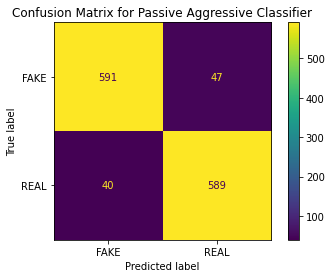

In [31]:
# Plotting the Confusion Matrix
pa_disp = plot_confusion_matrix(pa_clf, tfidf_test, y_test, labels=['FAKE', 'REAL'], values_format='.3g')
pa_dis_title = 'Confusion Matrix for Passive Aggressive Classifier'
pa_disp.ax_.set_title(pa_dis_title)

plt.show()

**Saving the Model for Future Use**

Now, lets save the model so that it can be used in the Telegram bot:


In [34]:
# Save the Model and TFIDF Vocabulary for later use
pickle.dump(tfidf_vectorizer, open("tfidf_vector.pickle", "wb"))
pickle.dump(tfidf_transform, open("tfidf_vocab.pickle", "wb"))
pickle.dump(pa_clf, open('pa_clf.sav', 'wb'))

## Final Thoughts

We succesfully trained a model to classify news articles as 'real' or 'fake' with a ~93% accuracy. The next step is to link the model to a Telegram bot so that we can use the model on external news articles (not in the dataset).